### Question 1

In [6]:
import pandas as pd
import string
import numpy as np
from collections import Counter
aas = set(string.ascii_uppercase) - set("BJOZXU")
res1 = "RATPTRWPVGCFNRPWTKWSYDEALDGIKAAGYAWTGLLTASKPSLHHATATPEYLAALKQKSRHAA"
res2 = "AAAVMMGLAAIGAAIGIGILGGKFLEGAARQPDLIPLLRTQFFIVMGLVDAIPMIAVGLGLYVMFAVA"
res3 = "AADVSAAVGATGQSGMTYRLGLSWDWDKSWWQTSTGRLTGYWDAGYTYWEGGDEGAGKHSLSFAPVFVYEFAGDSIKPFIEAGIGVAAFSGTRVGDQNLGSSLNFEDRIGAGLKFANGQSVGVRAIHYSNAGLKQPNDGIESYSLFYKIPI"
f1 = Counter(res1)
f1 = {r : f1[r] / len(res1) * 100 for r in sorted(aas)}
f2 = Counter(res2)
f2 = {r : f2[r] / len(res2) * 100 for r in sorted(aas)}
f3 = Counter(res3)
f3 = {r : f3[r] / len(res3) * 100 for r in sorted(aas)}
freq = []
for x in [f1,f2,f3]:
    freq.append(list(zip(*sorted(x.items())))[1])
df = pd.DataFrame(freq).T
df.index = sorted(aas)
df.columns = ['seq 1', "seq 2", "seq 3"]
df

,seq 1,seq 2,seq 3
A,17.910448,19.117647,10.596026
C,1.492537,0.000000,0.000000
D,2.985075,2.941176,5.960265
E,2.985075,1.470588,3.973510
F,1.492537,5.882353,5.298013
G,5.970149,14.705882,15.231788
H,4.477612,0.000000,1.324503
I,1.492537,11.764706,5.298013
K,7.462687,1.470588,3.973510
L,8.955224,13.235294,5.960265


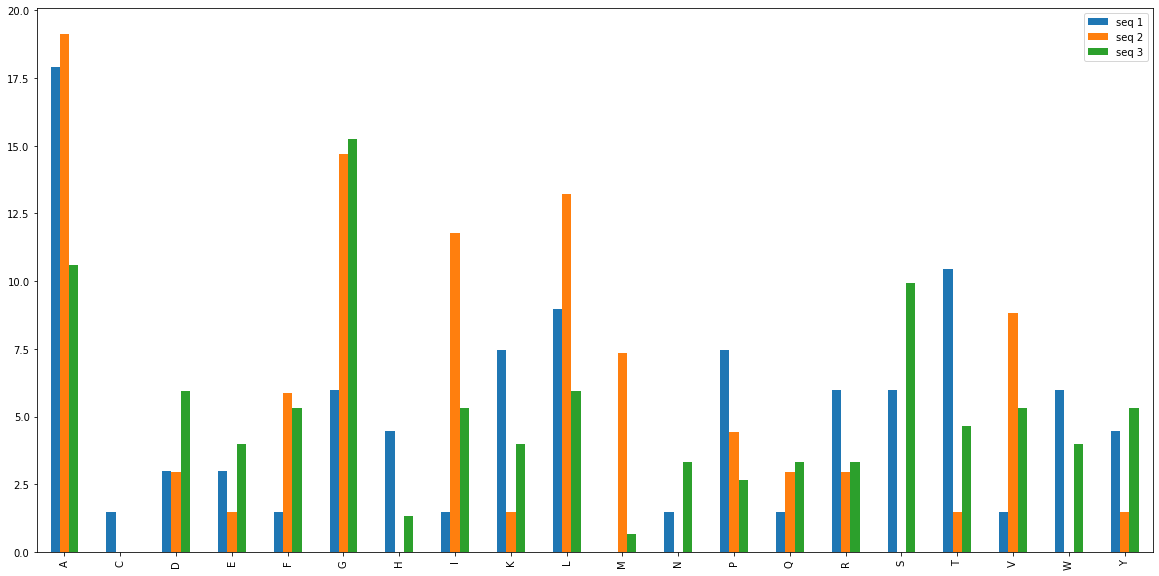

In [197]:
p = df.plot(kind = 'bar', figsize = (20,10))

- Sequence 1 has a high amount og Alanine and Threonine making some parts of it hydrophobic, while others hydrophillic   
- Sequence 2 has a high amount of hyfrophobic residues, alanine, glycine, isoleucine etc. making it very hydrophobic
- Sequence 3 has higher glycine, serine and alanine making it slightly hydrophilic dues to the prescence of serine


### Question 2

In [7]:
aa = "ACDEFGWHIKLMNYPQRSTV"
w = [85,115,130,145,160,70,200,150,125,145,125,143,130,175,110,140,170,100,115,110]
weights = {x : y for x,y in zip(aa,w)}
w1 = sum([y/100 * len(res1) * weights[x] for x,y in f1.items()]) - (len(res1)-1)*18
w2 = sum([y/100 * len(res2) * weights[x] for x,y in f2.items()]) - (len(res2)-1)*18
w3 = sum([y/100 * len(res3) * weights[x] for x,y in f3.items()]) - (len(res3)-1)*18

df = pd.DataFrame([w1,w2,w3])
df.index = ["seq 1", "seq 2", 'seq 3']
df.columns = ['Weight']
df

,Weight
seq 1,7127.0
seq 2,6529.0
seq 3,15453.0


### Question 3

In [9]:
import re
s = """Ala: 8.47, 8.95 Phe: 3.91, 3.68 Lys: 5.76, 4.93 Pro: 4.63, 3.74
Asp: 5.97, 5.91 Gly: 7.82, 8.54 Leu: 8.48, 8.78 Gln: 3.82, 4.75
Cys: 1.39, 0.47 His: 2.26, 1.25 Met: 2.21, 1.56 Arg: 4.93, 5.24
Glu: 6.32, 4.78 Ile: 5.71, 4.77 Asn: 4.54, 5.74 Ser: 5.94, 8.05
Thr: 5.79, 6.54 Val: 7.02, 6.76 Trp: 1.44, 1.24 Tyr: 3.58, 4.13"""

mapping = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

ress = re.findall("[A-z]{3}:.{11}",s)
comp = {}
for res in ress:
    r,w = res.split(': ')
    w = list(map(float,w.split(', ')))
    comp[r.upper()] = w
comp = {mapping[x] : y for x,y in comp.items()}

In [10]:
dev_a = []
dev_b = []
for freq in [f1,f2,f3]:
    dev_a.append(sum([abs(comp[x][0] - freq[x]) for x in aas]))
    dev_b.append(sum([abs(comp[x][1] - freq[x]) for x in aas]))

In [11]:
[abs(comp[x][0] - freq[x]) for x in aas]

[1.786490066225165,
 2.5197350993377485,
 1.9809933774834434,
 1.7219867549668866,
 2.1260264900662253,
 1.6187417218543043,
 0.009735099337747855,
 1.3880132450331129,
 1.39,
 0.9354966887417215,
 3.993774834437086,
 0.5087417218543044,
 1.5477483443708608,
 1.2287417218543046,
 2.533509933774835,
 1.718013245033113,
 2.3464900662251655,
 1.1542384105960268,
 0.41198675496688697,
 7.411788079470199]

In [179]:
df = pd.DataFrame([dev_a,dev_b]).T
df.columns = ['Deviation from A', "Deviation from B"]
df.index = ['seq 1', 'seq 2', 'seq 3']
df['Group'] = ["A",'A','B']
df

,Deviation from A,Deviation from B,Group
seq 1,55.844030,58.523731,A
seq 2,74.514706,76.838235,A
seq 3,38.332252,32.597815,B


### Question 4

In [6]:
def pairwise(res, type):
    p = [[0 for x in range(20)] for x in range(20)]
    for i,x in enumerate(sorted(aas)):
        for j,y in enumerate(sorted(aas)):
            if type == 1:
                p[i][j] = np.round(res.count(x+y) * 10**2 / (res.count(x) + res.count(y)) if res.count(x) + res.count(y) != 0 else 0, 2)
            elif type == 2:
                p[i][j] = np.round(res.count(x+y) * 10**2 / len(res), 2)
            elif type == 3:
                p[i][j] = np.round(res.count(x+y) * 10**2 / (res.count(x) * res.count(y)) if res.count(x) * res.count(y) != 0 else 0, 2)
    df = pd.DataFrame(p)
    df.columns = sorted(aas)
    df.index = sorted(aas)
    return df

Sequence 1, Formula 1

In [21]:
pairwise(res1,1)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,12.50,0.0,0.0,0.00,0.0,6.25,0.00,0.0,0.00,11.11,0.0,0.0,0.00,0.00,0.00,6.25,15.79,0.00,6.25,0.00
C,0.00,0.0,0.0,0.00,50.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.0,0.0,25.00,0.0,16.67,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,7.14,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00
F,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,20.0,0.0,0.00,0.0,0.00,0.00,20.0,0.00,10.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29
H,13.33,0.0,0.0,0.00,0.0,0.00,16.67,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
I,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,16.67,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K,5.88,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.00,16.67,0.00,11.11,0.00,0.00,11.11,0.00
L,5.56,0.0,12.5,0.00,0.0,0.00,11.11,0.0,9.09,8.33,0.0,0.0,0.00,0.00,0.00,0.00,7.69,0.00,0.00,0.00


Sequence 1, Formula 2

In [13]:
pairwise(res1,2)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,4.48,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,2.99,0.0,0.00,0.00,0.00,0.00,1.49,4.48,0.00,1.49,0.00
C,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,0.00,0.00,1.49,0.00,1.49,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49
F,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
G,0.00,1.49,0.00,0.00,0.00,0.00,0.00,1.49,0.00,1.49,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49
H,2.99,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
I,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.49,1.49,0.00,1.49,0.00,0.00,1.49,0.00
L,1.49,0.00,1.49,0.00,0.00,0.00,1.49,0.00,1.49,1.49,0.0,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00


Sequence 1, Formula 3

In [14]:
pairwise(res1,3)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,2.08,0.0,0.00,0.0,0.0,2.08,0.00,0.0,0.00,2.78,0,0.0,0.00,0.0,0.00,2.08,3.57,0.0,2.08,0.00
C,0.00,0.0,0.00,0.0,100.0,0.00,0.00,0.0,0.00,0.00,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
D,0.00,0.0,0.00,25.0,0.0,12.50,0.00,0.0,0.00,0.00,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
E,4.17,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,16.67
F,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0,100.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
G,0.00,25.0,0.00,0.0,0.0,0.00,0.00,25.0,0.00,4.17,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,8.33
H,5.56,0.0,0.00,0.0,0.0,0.00,11.11,0.0,0.00,0.00,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
I,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,20.00,0.00,0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
K,1.67,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0,0.0,4.00,20.0,0.00,5.00,0.00,0.0,5.00,0.00
L,1.39,0.0,8.33,0.0,0.0,0.00,5.56,0.0,3.33,2.78,0,0.0,0.00,0.0,0.00,0.00,2.38,0.0,0.00,0.00


Sequence 2, Formula 1

In [15]:
pairwise(res2,1)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,15.38,0.0,0.0,0.0,0.00,0.00,0.0,14.29,0.00,0.00,0.00,0.0,0.00,0.00,6.67,0.0,0.00,15.79,0.0,0.0
C,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
D,6.67,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,9.09,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
E,0.00,0.0,0.0,0.0,0.00,9.09,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
F,5.88,0.0,0.0,0.0,12.50,0.00,0.0,8.33,0.00,7.69,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
G,8.70,0.0,0.0,0.0,0.00,5.00,0.0,11.11,9.09,21.05,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
H,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
I,4.76,0.0,0.0,0.0,0.00,16.67,0.0,0.00,0.00,5.88,0.00,0.0,18.18,0.00,0.00,0.0,0.00,7.14,0.0,0.0
K,0.00,0.0,0.0,0.0,20.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
L,4.55,0.0,0.0,10.0,0.00,10.53,0.0,5.88,0.00,5.56,0.00,0.0,0.00,0.00,9.09,0.0,0.00,6.67,0.0,10.0


Sequence 2, Formula 2

In [16]:
pairwise(res2,2)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,5.88,0.0,0.00,0.00,0.00,0.00,0.0,4.41,0.00,0.00,0.00,0.0,0.00,0.00,1.47,0.0,0.00,4.41,0.0,0.00
C,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
D,1.47,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.47,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
E,0.00,0.0,0.00,0.00,0.00,1.47,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
F,1.47,0.0,0.00,0.00,1.47,0.00,0.0,1.47,0.00,1.47,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
G,2.94,0.0,0.00,0.00,0.00,1.47,0.0,2.94,1.47,5.88,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
H,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
I,1.47,0.0,0.00,0.00,0.00,4.41,0.0,0.00,0.00,1.47,0.00,0.0,2.94,0.00,0.00,0.0,0.00,1.47,0.0,0.00
K,0.00,0.0,0.00,0.00,1.47,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
L,1.47,0.0,0.00,1.47,0.00,2.94,0.0,1.47,0.00,1.47,0.00,0.0,0.00,0.00,1.47,0.0,0.00,1.47,0.0,1.47


Sequence 2, Formula 3

In [17]:
pairwise(res2,3)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,2.37,0,0.00,0.00,0.00,0.00,0,2.88,0.0,0.00,0.00,0,0.00,0.0,3.85,0,0.0,3.85,0,0.00
C,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
D,3.85,0,0.00,0.00,0.00,0.00,0,0.00,0.0,5.56,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
E,0.00,0,0.00,0.00,0.00,10.00,0,0.00,0.0,0.00,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
F,1.92,0,0.00,0.00,6.25,0.00,0,3.12,0.0,2.78,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
G,1.54,0,0.00,0.00,0.00,1.00,0,2.50,10.0,4.44,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
H,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
I,0.96,0,0.00,0.00,0.00,3.75,0,0.00,0.0,1.39,0.00,0,8.33,0.0,0.00,0,0.0,2.08,0,0.00
K,0.00,0,0.00,0.00,25.00,0.00,0,0.00,0.0,0.00,0.00,0,0.00,0.0,0.00,0,0.0,0.00,0,0.00
L,0.85,0,0.00,11.11,0.00,2.22,0,1.39,0.0,1.23,0.00,0,0.00,0.0,5.56,0,0.0,1.85,0,11.11


Sequence 3, Formula 1

In [18]:
pairwise(res3,1)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,9.38,0.0,4.00,0.00,4.17,15.38,0.0,4.17,0.00,0.00,0.00,4.76,5.00,0.00,0.00,0.00,4.35,4.17,0.00,0.00
C,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,4.00,0.0,0.00,6.67,0.00,3.12,0.0,0.00,6.67,0.00,0.00,0.00,0.00,7.14,7.14,4.17,0.00,5.88,6.67,0.00
E,4.55,0.0,6.67,0.00,7.14,6.90,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0.00,0.00,0.00
F,12.50,0.0,0.00,7.14,0.00,0.00,0.0,6.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.35,0.00,6.25,0.00,6.25
G,7.69,0.0,9.38,0.00,0.00,2.17,0.0,6.45,3.45,9.38,4.17,0.00,0.00,7.14,3.57,2.63,3.33,6.45,0.00,6.45
H,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,0.00,10.00
I,0.00,0.0,0.00,14.29,0.00,6.45,10.0,0.00,7.14,0.00,0.00,0.00,8.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K,0.00,0.0,0.00,0.00,7.14,0.00,12.5,7.14,0.00,0.00,0.00,0.00,10.00,9.09,0.00,4.76,0.00,0.00,0.00,0.00
L,0.00,0.0,0.00,0.00,5.88,6.25,0.0,0.00,13.33,0.00,0.00,7.14,0.00,0.00,0.00,8.33,6.25,0.00,0.00,0.00


Sequence 3, Formula 2

In [19]:
pairwise(res3,2)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,1.99,0.0,0.66,0.00,0.66,3.97,0.00,0.66,0.00,0.00,0.00,0.66,0.66,0.00,0.00,0.00,0.66,0.66,0.00,0.00
C,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.66,0.0,0.00,0.66,0.00,0.66,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.66,0.66,0.66,0.00,0.66,0.66,0.00
E,0.66,0.0,0.66,0.00,0.66,1.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00
F,1.99,0.0,0.00,0.66,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.66,0.00,0.66
G,1.99,0.0,1.99,0.00,0.00,0.66,0.00,1.32,0.66,1.99,0.66,0.00,0.00,1.32,0.66,0.66,0.66,1.32,0.00,1.32
H,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.66
I,0.00,0.0,0.00,1.32,0.00,1.32,0.66,0.00,0.66,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K,0.00,0.0,0.00,0.00,0.66,0.00,0.66,0.66,0.00,0.00,0.00,0.00,0.66,0.66,0.00,0.66,0.00,0.00,0.00,0.00
L,0.00,0.0,0.00,0.00,0.66,1.32,0.00,0.00,1.32,0.00,0.00,0.66,0.00,0.00,0.00,1.32,0.66,0.00,0.00,0.00


Sequence 3, Formula 3

In [20]:
pairwise(res3,3)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,1.17,0,0.69,0.00,0.78,1.63,0.00,0.78,0.00,0.00,0.00,1.25,1.56,0.00,0.00,0.00,0.89,0.78,0.00,0.00
C,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.69,0,0.00,1.85,0.00,0.48,0.00,0.00,1.85,0.00,0.00,0.00,0.00,2.22,2.22,0.74,0.00,1.39,1.85,0.00
E,1.04,0,1.85,0.00,2.08,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,0.00,0.00
F,2.34,0,0.00,2.08,0.00,0.00,0.00,1.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83,0.00,1.56,0.00,1.56
G,0.82,0,1.45,0.00,0.00,0.19,0.00,1.09,0.72,1.45,4.35,0.00,0.00,1.74,0.87,0.29,0.62,1.09,0.00,1.09
H,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,0.00,0.00,0.00,6.25
I,0.00,0,0.00,4.17,0.00,1.09,6.25,0.00,2.08,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K,0.00,0,0.00,0.00,2.08,0.00,8.33,2.08,0.00,0.00,0.00,0.00,4.17,3.33,0.00,1.11,0.00,0.00,0.00,0.00
L,0.00,0,0.00,0.00,1.39,0.97,0.00,0.00,3.70,0.00,0.00,2.22,0.00,0.00,0.00,1.48,1.59,0.00,0.00,0.00


#### Top pair preferences

In [78]:
def pref(res,type):
    if res == res1:
        s = 1
    elif res == res2:
        s = 2
    else:
        s = 3
    print(f'\t\tSequence {s}, Formula {type}\n')
    df = pd.DataFrame(sorted(zip(np.array(pairwise(res,type)).flatten(), [x+y for x in sorted(aas) for y in sorted(aas)]), reverse = True)[:10])
    df.columns = ['Preference', 'Residue']
    df.index = df.Residue
    return df.drop(axis = 1, columns = ['Residue']).T

In [85]:
for res in [res1,res2,res3]:
    for t in [1,2,3]:
        display(pref(res,t))

		Sequence 1, Formula 1



Residue,FN,CF,DE,YD,VG,NR,GI,GC,EY,WT
Preference,50.0,50.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,18.18


		Sequence 1, Formula 2



Residue,AT,AA,WT,TP,TA,HA,AL,YL,YD,YA
Preference,4.48,4.48,2.99,2.99,2.99,2.99,2.99,1.49,1.49,1.49


		Sequence 1, Formula 3



Residue,FN,CF,VG,NR,GI,GC,DE,QK,PV,KQ
Preference,100.0,100.0,25.0,25.0,25.0,25.0,25.0,20.0,20.0,20.0


		Sequence 2, Formula 1



Residue,TQ,RT,VM,RQ,GL,QP,PD,KF,IP,QF
Preference,33.33,33.33,27.27,25.0,21.05,20.0,20.0,20.0,18.18,16.67


		Sequence 2, Formula 2



Residue,GL,AA,VM,IG,AV,AI,MG,LG,IP,GI
Preference,5.88,5.88,4.41,4.41,4.41,4.41,2.94,2.94,2.94,2.94


		Sequence 2, Formula 3



Residue,TQ,RT,RQ,KF,YV,QP,PD,QF,LY,LE
Preference,50.0,50.0,25.0,25.0,16.67,16.67,16.67,12.5,11.11,11.11


		Sequence 3, Formula 1



Residue,WD,AG,YW,RL,IE,TY,LK,SL,MT,KH
Preference,20.0,15.38,14.29,14.29,14.29,13.33,13.33,12.5,12.5,12.5


		Sequence 3, Formula 2



Residue,AG,WD,VG,TG,SL,GL,GD,GA,FA,AA
Preference,3.97,1.99,1.99,1.99,1.99,1.99,1.99,1.99,1.99,1.99


		Sequence 3, Formula 3



Residue,MT,KH,IH,HY,WD,QP,PN,RL,GM,YW
Preference,14.29,8.33,6.25,6.25,5.56,5.0,5.0,4.44,4.35,4.17


### Question 5

In [147]:
text = open("properties.txt").read()
order = re.search('Property.*',text).group(0)
order = [mapping[x.upper()] for x in order.split(' ') if x != '' and x != 'Property']
hgm = re.search('Hgm.*',text).group(0)
hgm = [float(x) for x in hgm.split(' ') if x != '' and x != 'Hgm']
et = re.search('Et.*',text).group(0)
et = [float(x) for x in et.split(' ') if x != '' and x != 'Et']
ca = re.search('Ca.*',text).group(0)
ca = [float(x) for x in ca.split(' ') if x != '' and x != 'Ca']
d = {x : (a,b,c) for x,a,b,c in zip(order,hgm,ca,et)}

In [154]:
def prop(res,p):
    if p == 1:
        return sum([d[r][p-1] for r in res])/len(res)
    if p == 2 or p == 3:
        return sum([d[r][p-1] for r in res])

In [160]:
for res in [res1,res2,res3]:
    for p,name in zip([1,2,3],['Average hydrophobicity', 'Helical contact area', 'Total non-bonded energy']):
        print(f"{name} : {prop(res,p)}")
    print('--------------')

Average hydrophobicity : 13.352537313432844
Helical contact area : 2156.0
Total non-bonded energy : 117.74000000000005
--------------
Average hydrophobicity : 13.77161764705882
Helical contact area : 2067.0
Total non-bonded energy : 126.66000000000003
--------------
Average hydrophobicity : 13.418675496688737
Helical contact area : 4616.0
Total non-bonded energy : 267.7500000000001
--------------


- Hydrophobicites of all sequences are similar
- Sequnece 3 appears to exist in a alpha helix
- Sequnece 3 has high non bounded enegry because of the prescence of glycine